In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv('cleaned.csv')

dataset.head(5)

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [5]:
#listof last fiverows
dataset.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [7]:
# shape
dataset.shape
#rows columns

(45166, 12)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 3.6+ MB


In [9]:
 dataset['rating'].describe()

count    45166.000000
mean         4.218594
std          1.221118
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

In [10]:
dataset.nunique()

item_id       1892
user_id      40401
rating           5
timestamp     4179
gender           2
category        10
brand           50
year            19
month           12
quantity         6
unitprice     5001
amount       19611
dtype: int64

In [11]:
 # check for missing values
 dataset.isnull().sum()

item_id      0
user_id      0
rating       0
timestamp    0
gender       0
category     0
brand        0
year         0
month        0
quantity     0
unitprice    0
amount       0
dtype: int64

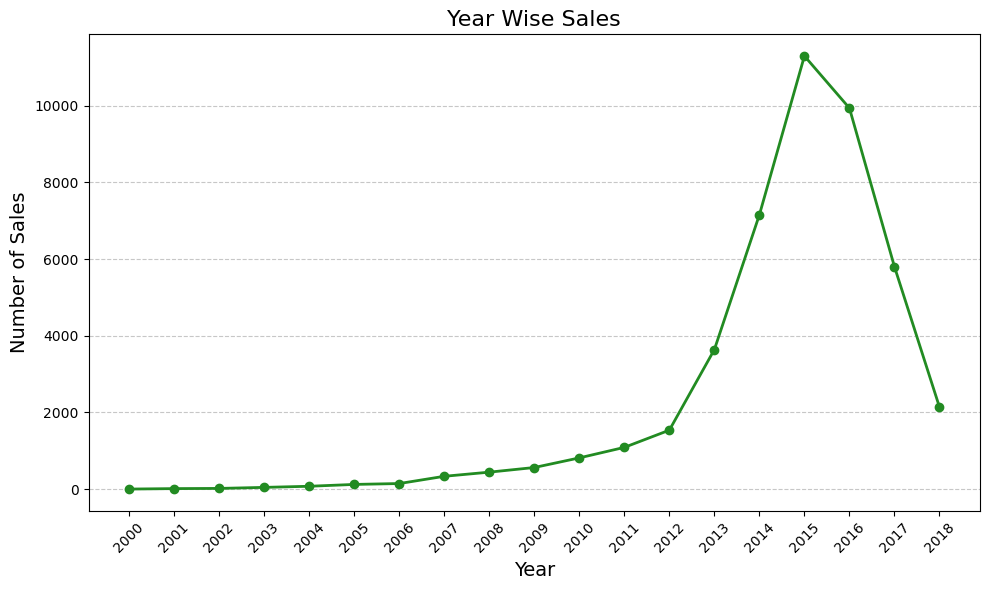

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('cleaned.csv')

# Group by year and count the sales
sales_per_year = dataset.groupby('year')['amount'].count()

# Create a line plot
plt.figure(figsize=(10, 6))  # Adjust figure size
sales_per_year.plot(kind='line', marker='o', color='forestgreen', linewidth=2)  # Line chart with markers

# Adding titles and labels
plt.title('Year Wise Sales', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Sales', fontsize=14)

# Set x-ticks to be integer years
plt.xticks(ticks=sales_per_year.index, labels=sales_per_year.index.astype(int), rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Inference:
 From the graph we just plotted we can see that year 2015 had the best sales out of all years.
 There was a steady increase of sales from the year 2007 to 2015 then a slight decline in
 2016. That decline in sales was big in the following years of 2017 and 2018.

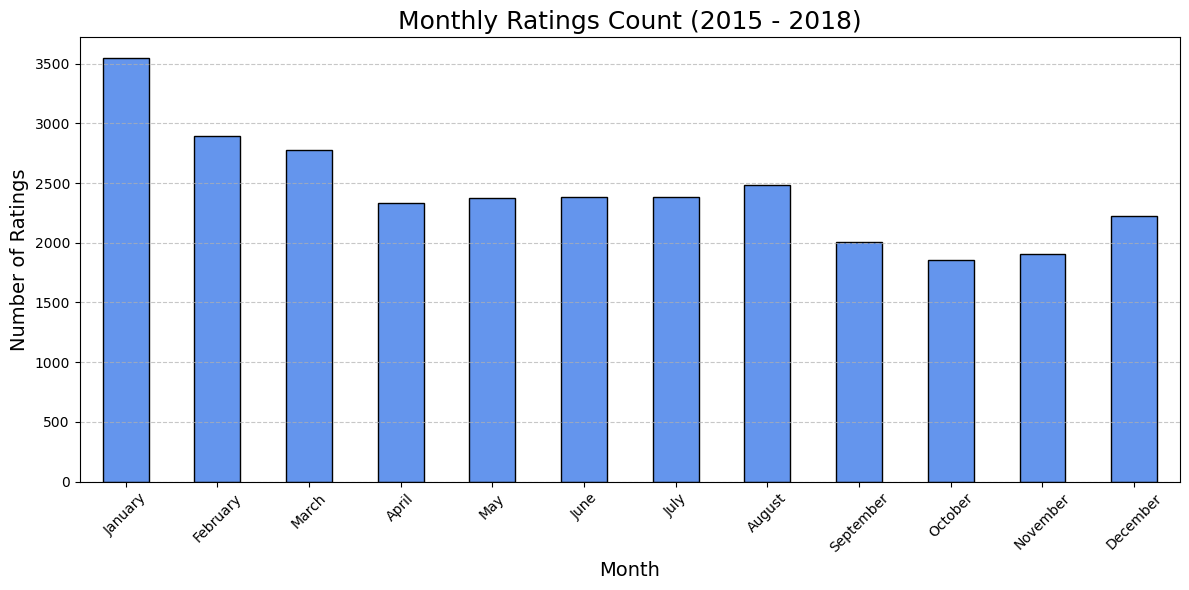

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
# what was the best month of sales
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by month and count the ratings
ratings_per_month = dataset_2015_2018.groupby('month')['rating'].count()

month_names = [calendar.month_name[i] for i in range(1, 13)]
ratings_per_month.index = month_names[:len(ratings_per_month)]

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set figure size
ratings_per_month.plot(kind='bar', color='cornflowerblue', edgecolor='black')

# Adding titles and labels
plt.title('Monthly Ratings Count (2015 - 2018)', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Ratings', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

 Inference:
 January was the month when most sales were made across the product categories and
 over the years.

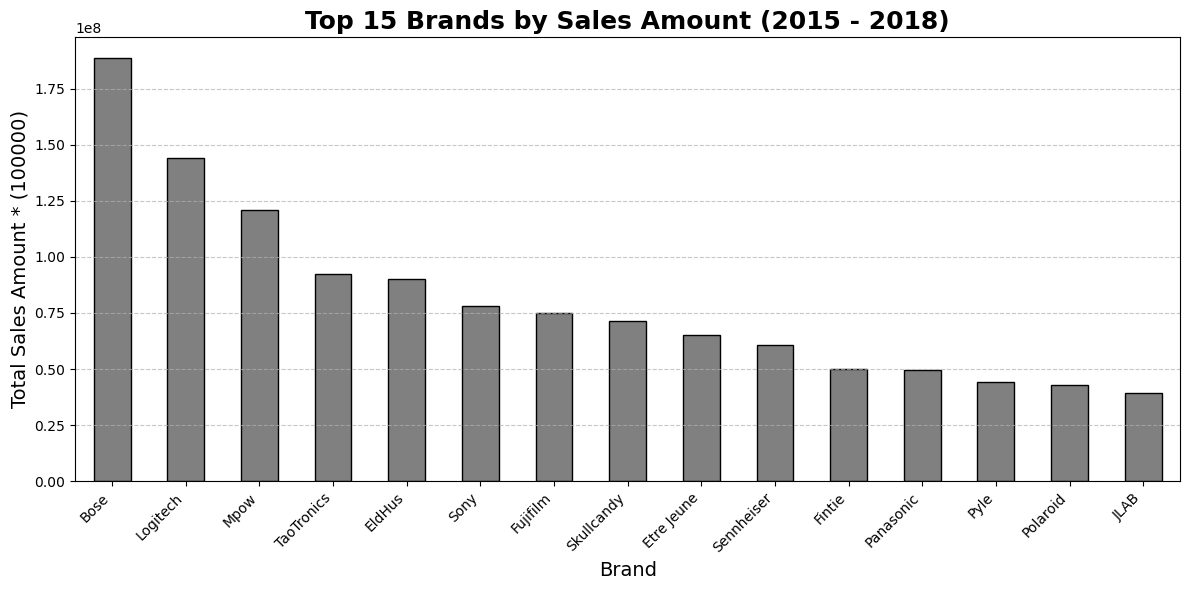

In [24]:
# what brand sold the most in 2015 to 2018
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by brand, sum the sales amount, and get the top 10 brands
top_brands = dataset_2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=False).head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set figure size
top_brands.plot(kind='bar', color='gray', edgecolor='black')

# Adding titles and labels
plt.title('Top 15 Brands by Sales Amount (2015 - 2018)', fontsize=18, fontweight='bold')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Total Sales Amount * (100000)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


 Inference:
 Bose was the brand with the most sales in 2015 to 2018 followed by Logitech.

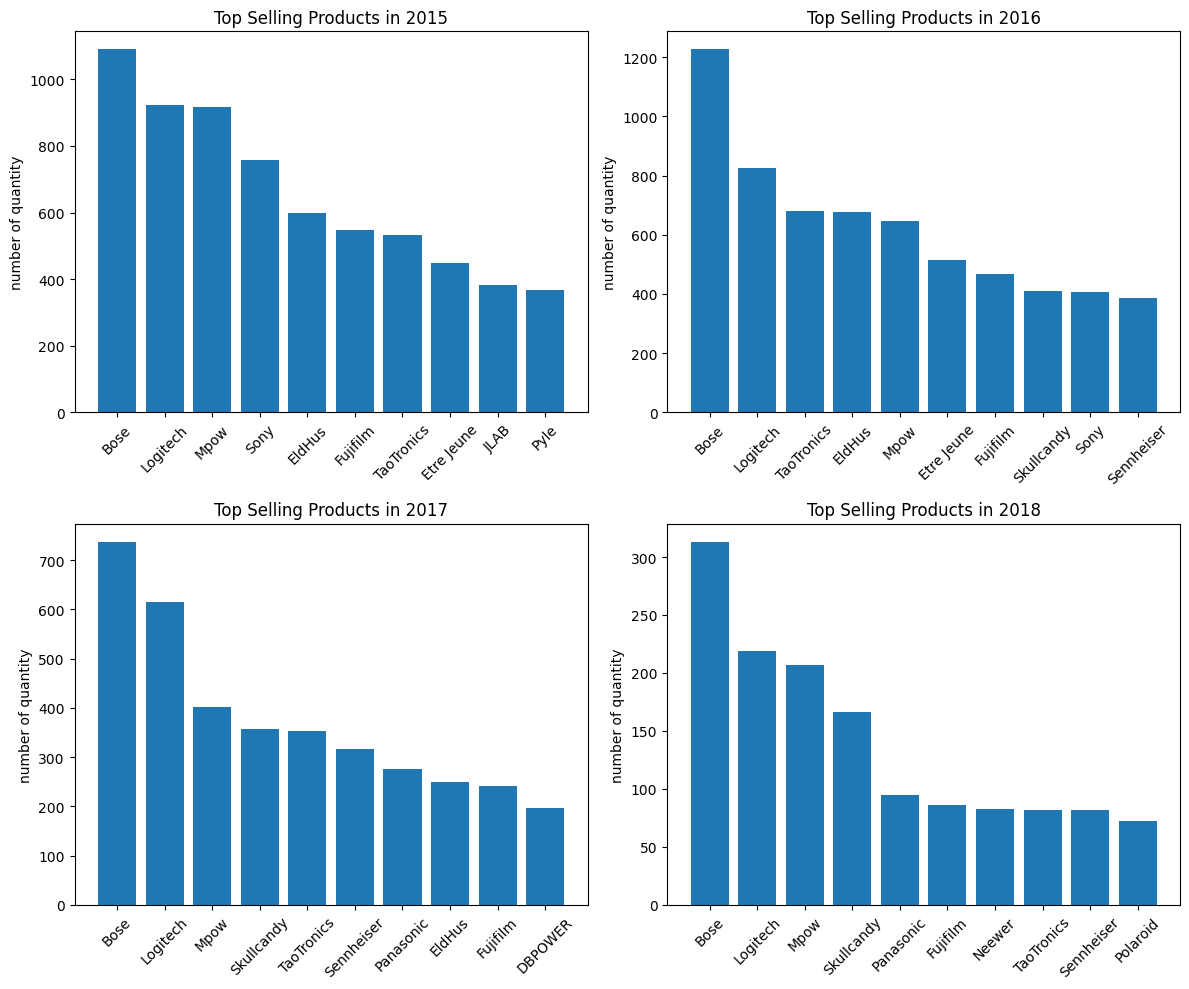

In [19]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# Plot for 2015
top_selling_2015 = dataset[dataset['year'] ==
2015].groupby('brand')['quantity'].count().sort_values(ascending=False).head(10)
axs[0, 0].bar(top_selling_2015.index, top_selling_2015)
axs[0, 0].set_title('Top Selling Products in 2015')
axs[0, 0].set_ylabel('number of quantity')
axs[0, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels


# Plot for 2016
top_selling_2016 = dataset[dataset['year'] ==
2016].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[0, 1].bar(top_selling_2016.index, top_selling_2016)
axs[0, 1].set_title('Top Selling Products in 2016')
axs[0, 1].set_ylabel('number of quantity')
axs[0, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels

# Plot for 2017
top_selling_2017 = dataset[dataset['year'] ==
2017].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 0].bar(top_selling_2017.index, top_selling_2017)
axs[1, 0].set_title('Top Selling Products in 2017')
axs[1, 0].set_ylabel('number of quantity')
axs[1, 0].tick_params(axis='x', rotation=45) # Rotate x-axis labels

# Plot for 2018
top_selling_2018 = dataset[dataset['year'] ==
2018].groupby('brand')['rating'].count().sort_values(ascending=False).head(10)
axs[1, 1].bar(top_selling_2018.index, top_selling_2018)
axs[1, 1].set_title('Top Selling Products in 2018')
axs[1, 1].set_ylabel('number of quantity')
axs[1, 1].tick_params(axis='x', rotation=45) # Rotate x-axis labels

# Adjust layout for better appearance
plt.tight_layout()
# Show the plots
plt.show()


Inference:
 There has been one consistent Brand product with the most sales in the 3 years and it
 is Bose.
 The second most sold brand's products have been Logitech.
 ● 2016(Bose and Logitech)
 ● 2017(Bose and Logitech)
 ● 2018(Bose and Logitech)

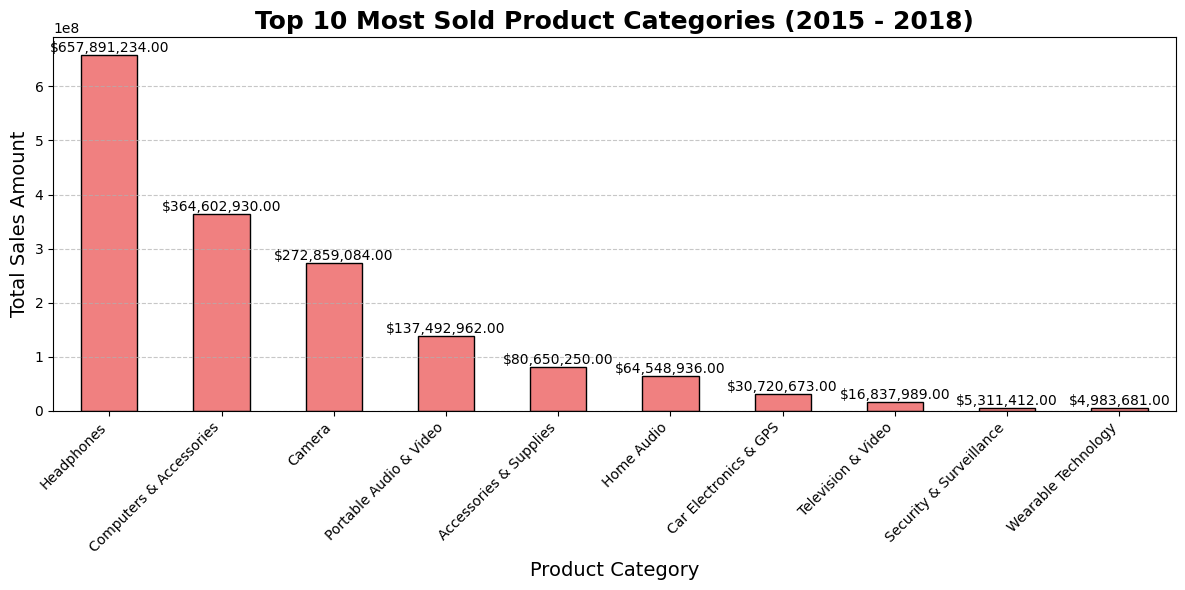

In [20]:
# What product by category sold the most between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by category and sum the amounts, then get the top 10
top_categories = dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set figure size
bars = top_categories.plot(kind='bar', color='lightcoral', edgecolor='black')

# Set titles and labels
plt.title('Top 10 Most Sold Product Categories (2015 - 2018)', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with their total sales amount
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

 Inference:
 Wecan see that the category of Headphones sold the most, computers and accessories were sold the second most while cameras sold the third most .

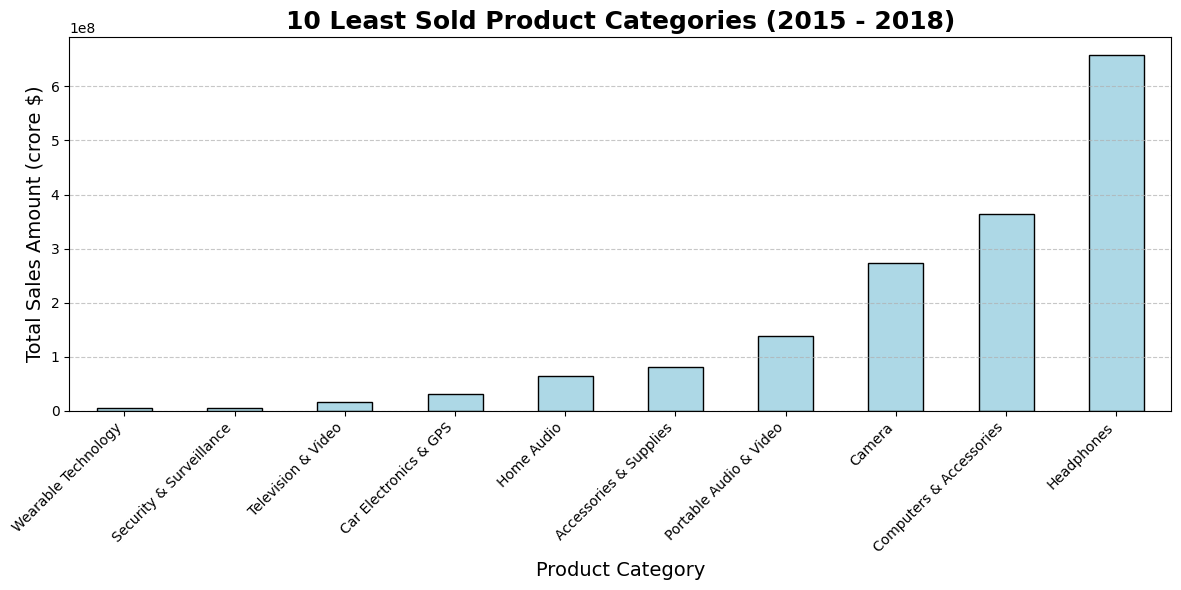

In [23]:
# What product by brand name sold the least between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by category, sum the amounts, and get the 10 least sold categories
least_sold_categories = dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=True).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set figure size
bars = least_sold_categories.plot(kind='bar', color='lightblue', edgecolor='black')

# Set titles and labels
plt.title('10 Least Sold Product Categories (2015 - 2018)', fontsize=18, fontweight='bold')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Sales Amount (crore $)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

 Inference:
 Wecan see that the category of Wearable Technology sold the least followed closely by Security and Surveillance.

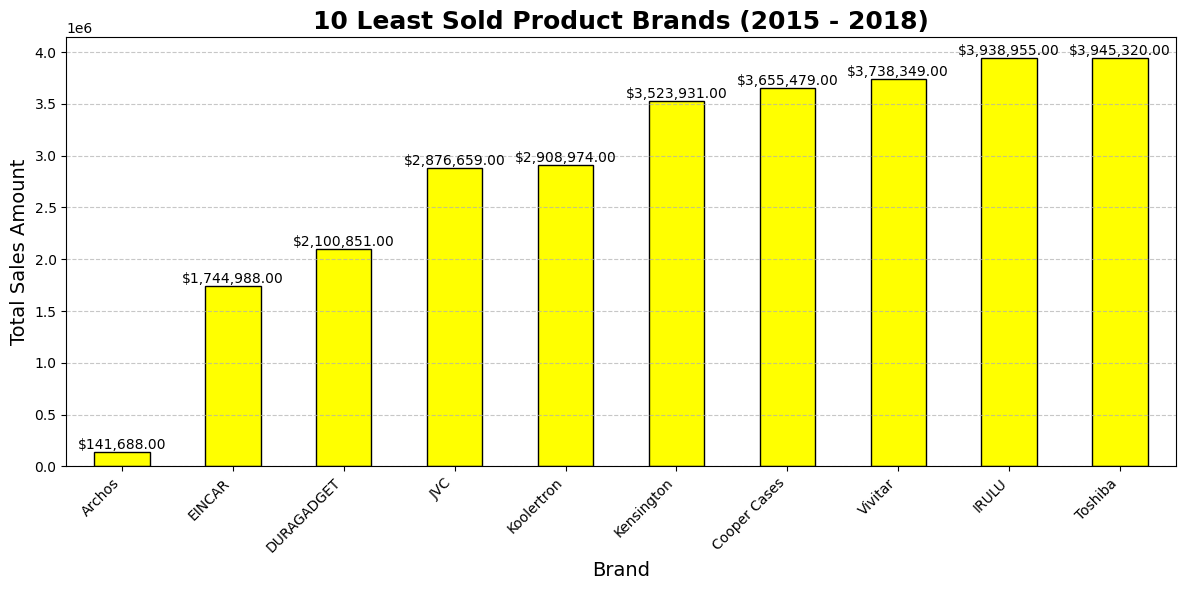

In [23]:
 # What product by brand name sold the least between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by brand, sum the amounts, and get the 10 least sold brands
least_sold_brands = dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set figure size
bars = least_sold_brands.plot(kind='bar', color='yellow', edgecolor='black')

# Set titles and labels
plt.title('10 Least Sold Product Brands (2015 - 2018)', fontsize=18, fontweight='bold')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

 Inference:
 Archos sold the least followed closely with EINCAR

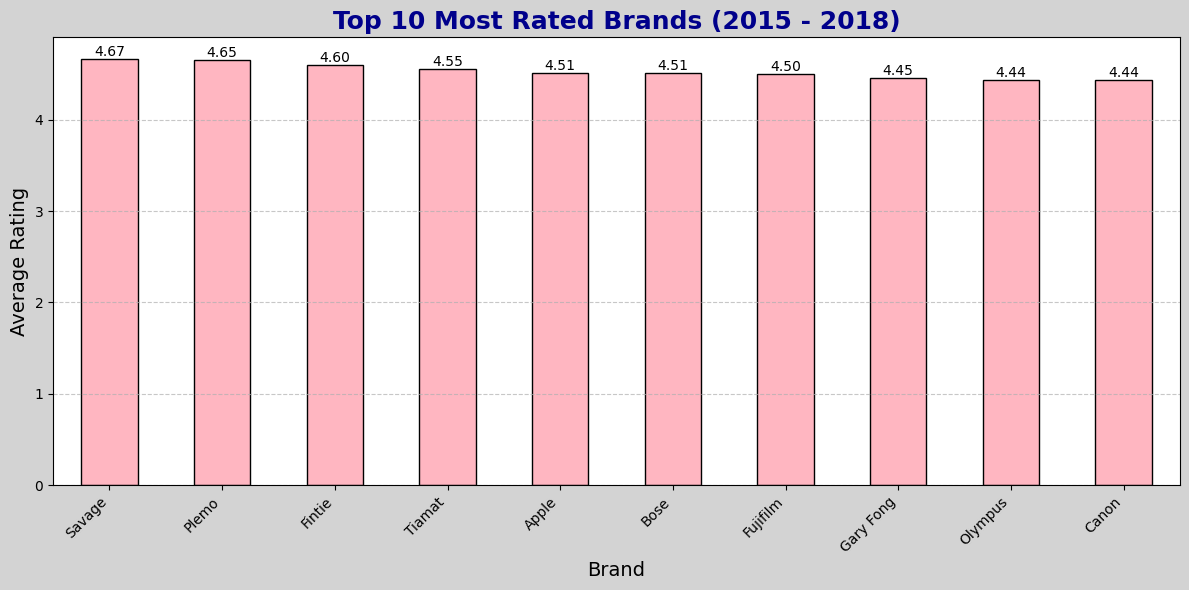

In [10]:
# What is the most rated brand name between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by brand, calculate the mean rating, and get the top 10 brands
top_rated_brands = dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10)

# Create a bar plot 
plt.figure(figsize=(12, 6), facecolor='lightgray')  # Set figure size and background color
bars = top_rated_brands.plot(kind='bar', color='lightpink', edgecolor='black')

# Set titles and labels
plt.title('Top 10 Most Rated Brands (2015 - 2018)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Brand', fontsize=14, color='black')
plt.ylabel('Average Rating', fontsize=14, color='black')
plt.xticks(rotation=45, ha='right', color='black')  # Rotate x-axis labels for better readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Inference: All Brands has over the rating 4 but Savage and Plemo with the highest ratings

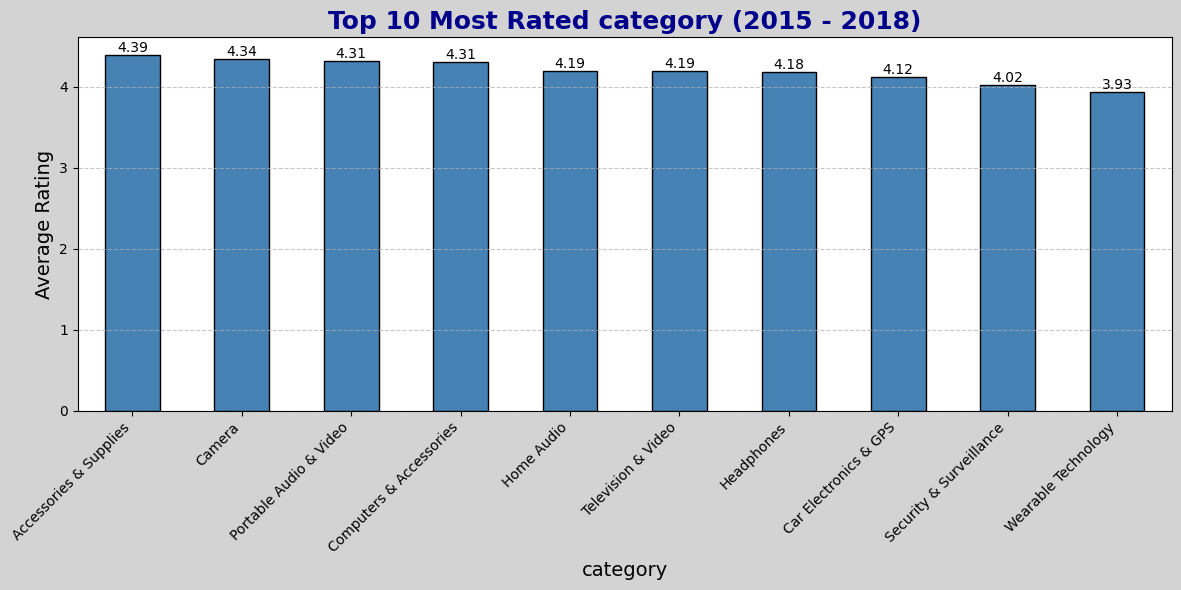

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv('cleaned.csv')

# What is the most rated brand name between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by brand, calculate the mean rating, and get the top 10 brands
top_rated_brands = dataset2015_2018.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

# Create a bar plot 
plt.figure(figsize=(12, 6), facecolor='lightgray')  # Set figure size and background color
bars = top_rated_brands.plot(kind='bar', color='steelblue', edgecolor='black')

# Set titles and labels
plt.title('Top 10 Most Rated category (2015 - 2018)', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('category', fontsize=14, color='black')
plt.ylabel('Average Rating', fontsize=14, color='black')
plt.xticks(rotation=45, ha='right', color='black')  # Rotate x-axis labels for better readability

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

  Inference: All categories has over the rating 4 but Accessories_&_supplies and Camera with the highest ratings

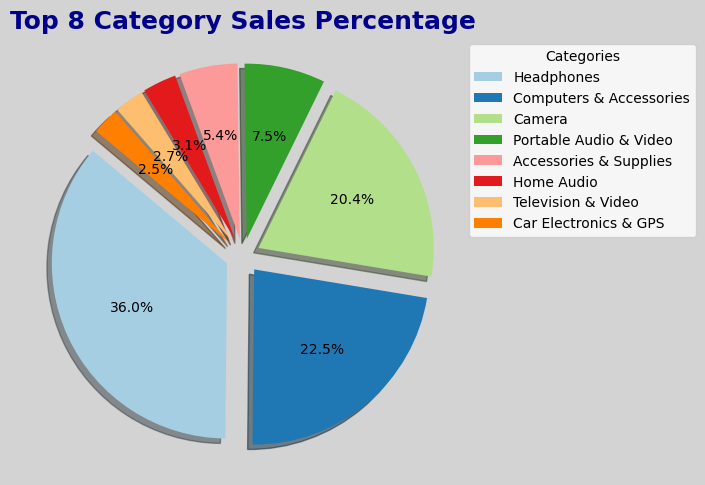

In [6]:
# category percentage sales
top_categories = dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(8)

# Create a pie chart
plt.figure(figsize=(7, 7), facecolor='lightgray')  # Set figure size and background color
plt.pie(top_categories, 
        autopct='%1.1f%%', 
        startangle=140,  # Start angle for better orientation
        colors=plt.cm.Paired.colors,  # Use a color map for better color variety
        shadow=True,  # Add shadow effect for 3D look
        explode=[0.1] * len(top_categories)  # Slightly explode all slices
       )

# Set title
plt.title('Top 8 Category Sales Percentage', fontsize=18, fontweight='bold', color='darkblue')

# Add legend
plt.legend(top_categories.index, title="Categories", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Inference:
 Headphones sales % is the highest followed by Computers & Accessories.

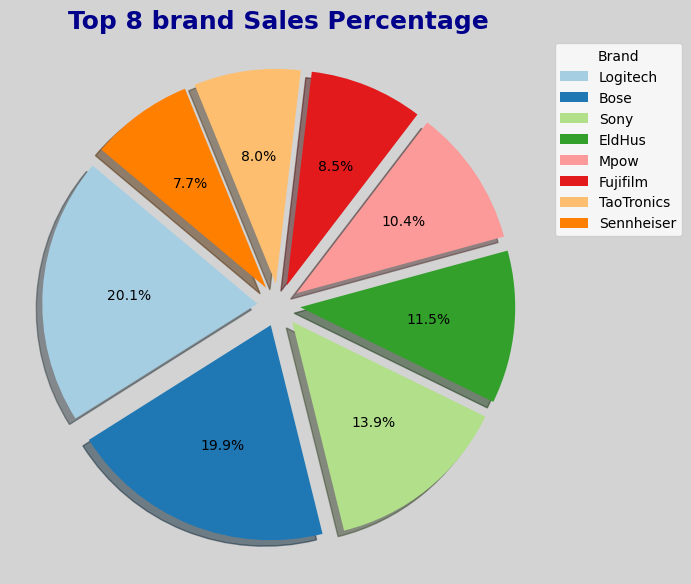

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv('cleaned.csv')

top_categories = dataset.groupby('brand')['amount'].sum().sort_values(ascending=False).head(8)

# Create a pie chart
plt.figure(figsize=(7, 7), facecolor='lightgray')  # Set figure size and background color
plt.pie(top_categories, 
        autopct='%1.1f%%', 
        startangle=140,  # Start angle for better orientation
        colors=plt.cm.Paired.colors,  # Use a color map for better color variety
        shadow=True,  # Add shadow effect for 3D look
        explode=[0.1] * len(top_categories)  # Slightly explode all slices
       )

# Set title
plt.title('Top 8 brand Sales Percentage', fontsize=18, fontweight='bold', color='darkblue')

# Add legend
plt.legend(top_categories.index, title="Brand", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Inference: Logitech sales % is the highest followed by Computers & Accessories.

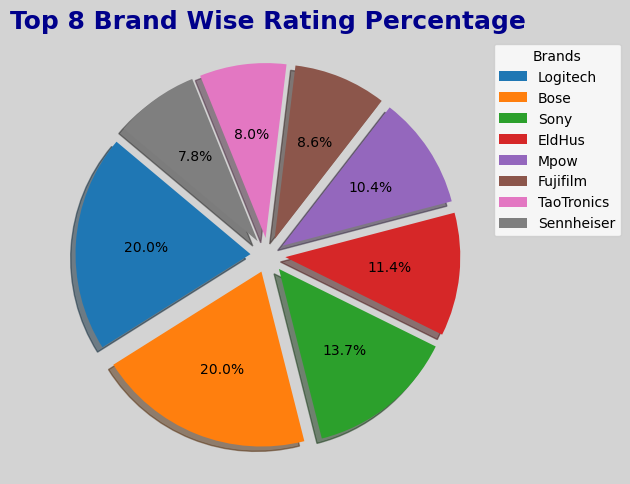

In [7]:
# brand wise sales percentage
top_brands = dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(8)

# Create a pie chart
plt.figure(figsize=(6, 6), facecolor='lightgray')  # Set figure size and background color
plt.pie(top_brands, 
        autopct='%1.1f%%', 
        startangle=140,  # Start angle for better orientation
        colors=plt.cm.tab10.colors,  # Use a colormap for varied colors
        shadow=True,  # Add shadow effect for a 3D look
        explode=[0.1] * len(top_brands)  # Slightly explode all slices for emphasis
       )

# Set title
plt.title('Top 8 Brand Wise Rating Percentage', fontsize=18, fontweight='bold', color='darkblue')

# Add legend
plt.legend(top_brands.index, title="Brands", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Inference:
 Bose and Logitech sales % is the highest followed by Sony

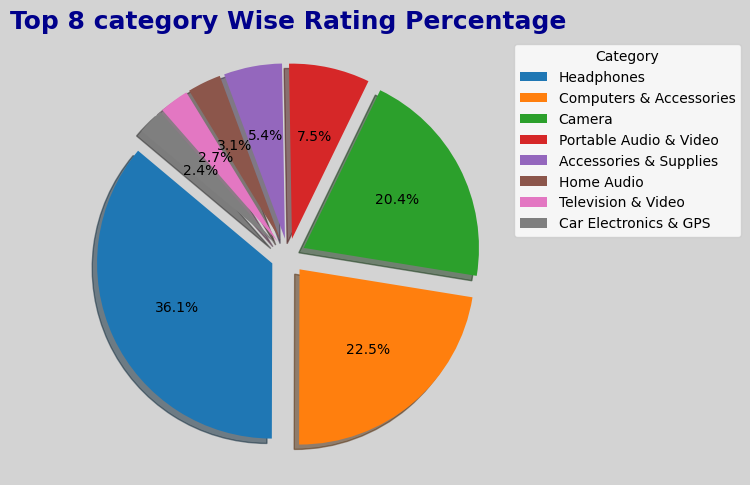

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv('cleaned.csv')

# brand wise sales percentage
top_brands = dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(8)

# Create a pie chart
plt.figure(figsize=(7, 7), facecolor='lightgray')  # Set figure size and background color
plt.pie(top_brands, 
        autopct='%1.1f%%', 
        startangle=140,  # Start angle for better orientation
        colors=plt.cm.tab10.colors,  # Use a colormap for varied colors
        shadow=True,  # Add shadow effect for a 3D look
        explode=[0.1] * len(top_brands)  # Slightly explode all slices for emphasis
       )

# Set title
plt.title('Top 8 category Wise Rating Percentage', fontsize=18, fontweight='bold', color='darkblue')

# Add legend
plt.legend(top_brands.index, title="Category", loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Inference: Camera and Computer & Accesssories % is the highest followed by Camera

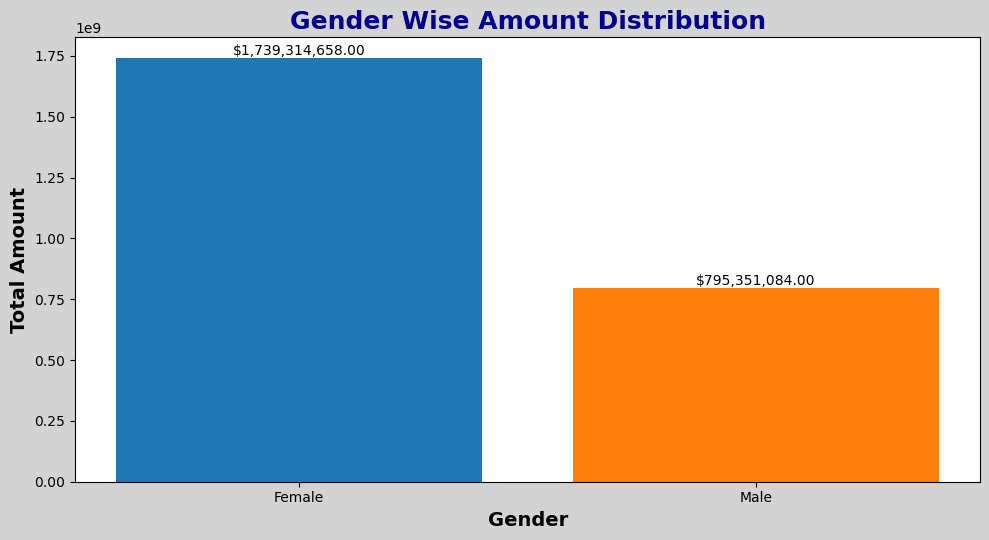

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
dataset = pd.read_csv('cleaned.csv')

# Gender wise sales amount
gender_distribution = dataset.groupby('gender')['amount'].sum().sort_values(ascending=False)

# Create a bar graph
plt.figure(figsize=(10, 5.5), facecolor='lightgray')  # Set figure size and background color
bars = plt.bar(gender_distribution.index, gender_distribution, color=plt.cm.tab10.colors)

# Add title and labels
plt.title('Gender Wise Amount Distribution', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Total Amount', fontsize=14, fontweight='bold')

# Add value annotations on top of the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'${bar.get_height():,.2f}', 
             ha='center', va='bottom', fontsize=10)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


Inference: The bar graph shows that [insert gender] has significantly higher sales than [insert other gender], 
indicating stronger product preference and potential for targeted marketing strategies.

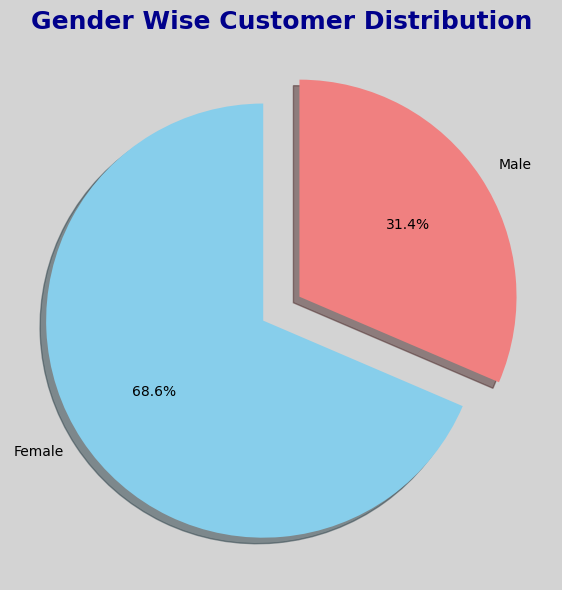

In [8]:
# Gender wise customer distribution
gender_distribution = dataset['gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6), facecolor='lightgray')  # Set figure size and background color
plt.pie(gender_distribution, 
        labels=gender_distribution.index,
        autopct='%1.1f%%', 
        startangle=90,  # Start angle for better orientation
        colors=['skyblue', 'lightcoral'],  # Custom colors for slices
        shadow=True,  # Add shadow effect for a 3D look
        explode=[0.1] * len(gender_distribution)  # Slightly explode slices for emphasis
       )

# Set title
plt.title('Gender Wise Customer Distribution', fontsize=18, fontweight='bold', color='darkblue')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

Inference:
Most of the customers are in Female categories

 Conclusion:
 ● 2015was the best year in terms of sales and profit
 ● Headphones was the category with most sales followed closely wit
Computer and Accessories while the least sales were made in the Category Security & Surveillance.
 ● There has been a steady rise in sales from 2007 to 2015 and a sharp decline from 2016 to 2018.
 ● Thebrand name Bose sold the most followed by Logitech.
 ● Thebrand Archos sold the least followed closely with EINCAR..
 ● Mostproducts were rated 5.
 ● Bestrated brands were Savage and Plemo

 The above analysis should help you to understand and explore further on the reasons
 behind the popularity and/or poor sales of the products. With this foresight a company
 can make decisions whether to continue production/sales of a specific product for the
 future